In [42]:
from __future__ import division
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [23]:
data = np.zeros(100)
data[70:] = 1

In [24]:
def get_acc(pred, real):
    return np.sum([1 - abs(pred[i]-real[i]) for i in range(len(pred))])/len(pred)

In [30]:
test = np.zeros(50)
test[30:] = 1

In [33]:
def h(x, p): 
    if p > 0.5: return 1 
    else: return 0

In [36]:
pred = [h(t, 0.7) for t in test]

In [37]:
get_acc(pred,test)

0.40000000000000002

In [46]:
all_ps = np.arange(0,1,0.001)
def cost(h, p, data):
    return np.sum([abs(h(d,p) - d) for d in data])

In [40]:
cost(h, 0.7, data)

70.0

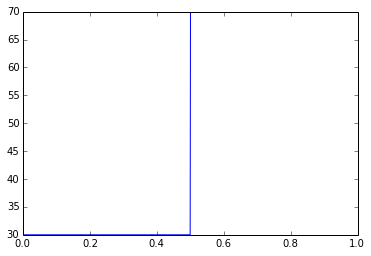

In [47]:
plt.plot(all_ps, [cost(h, p, data) for p in all_ps])

In [48]:
best_p = all_ps[np.argmin([cost(h, p, data) for p in all_ps])]

In [54]:
def create_model(data):
    def h(x, p): 
        if p > 0.5: return 1 
        else: return 0
    all_ps = np.arange(0,1,0.001)
    best_p = all_ps[np.argmin([cost(h, p, data) for p in all_ps])]
    
    def final_h(x):
        return h(x, best_p)
    
    return final_h

In [55]:
predict = create_model(data)

In [57]:
predict(100)

0

In [78]:
data = np.array([[150, 0] ,[155, 0] ,[157, 0] ,[160, 0] ,[160, 1] ,[170, 1] ,[170, 1] ,[175, 1] ,[180, 1] ,[185, 1]])

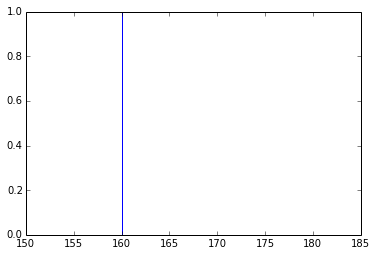

In [80]:
plt.plot(data[:,0], data[:,1])

In [79]:
test = np.array([[152, 0]  ,[161, 0] ,[172, 1] ,[181, 1]])

In [108]:
all_ps = np.arange(0,200,1)
def h(x, p): 
    if x > p: return 1 
    else: return 0
def cost(h, p, data):
    return np.sum([abs(h(d[0],p) - d[1]) for d in data]) 
def create_model(data):
    best_p = all_ps[np.argmin([cost(h, p, data) for p in all_ps])]
    
    def final_h(x):
        return h(x, best_p)
    
    return final_h, best_p

In [111]:
model, best_p = create_model(data)
best_p

157

In [112]:
predicted = [pred(t[0]) for t in test]

In [113]:
get_acc(predicted, test[:,1])

1.0

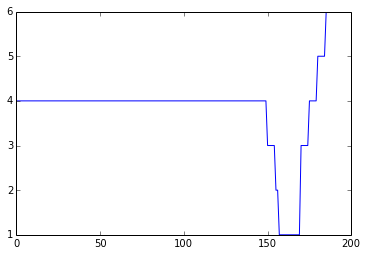

In [114]:

plt.plot(all_ps, [cost(h, p, data) for p in all_ps])